In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import joblib

In [4]:
from joblib import load, dump

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
import seaborn as sns

In [8]:
import pickle

In [9]:
import matplotlib.pyplot as plt

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# Load the Iris dataset
data = pd.read_csv('penguins_lter.csv')  # Ensure the file path is correct

In [13]:
# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper

In [14]:
# Select relevant features for the model
data = data[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Species']]
data.rename(columns={'Species': 'species'}, inplace=True)  # Rename column to a lowercase standard

In [15]:
# Summary statistics of the data
print("\nSummary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
       Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
count          342.000000         342.000000           342.000000   
mean            43.921930          17.151170           200.915205   
std              5.459584           1.974793            14.061714   
min             32.100000          13.100000           172.000000   
25%             39.225000          15.600000           190.000000   
50%             44.450000          17.300000           197.000000   
75%             48.500000          18.700000           213.000000   
max             59.600000          21.500000           231.000000   

       Body Mass (g)  
count     342.000000  
mean     4201.754386  
std       801.954536  
min      2700.000000  
25%      3550.000000  
50%      4050.000000  
75%      4750.000000  
max      6300.000000  


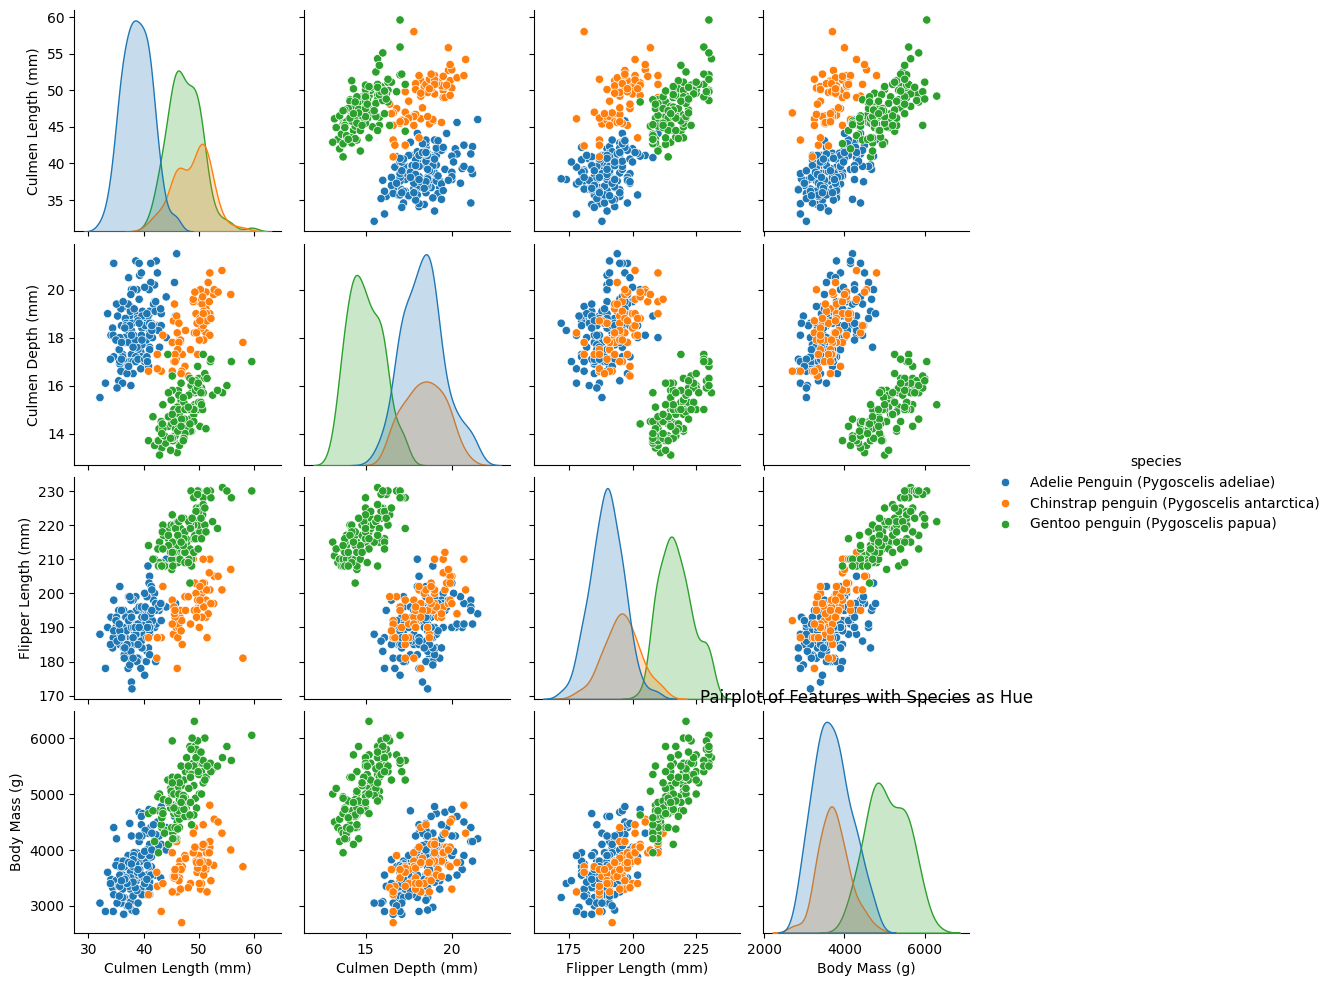

In [16]:
# Visualize relationships between features and species
sns.pairplot(data, hue="species")
plt.title("Pairplot of Features with Species as Hue")
plt.show()

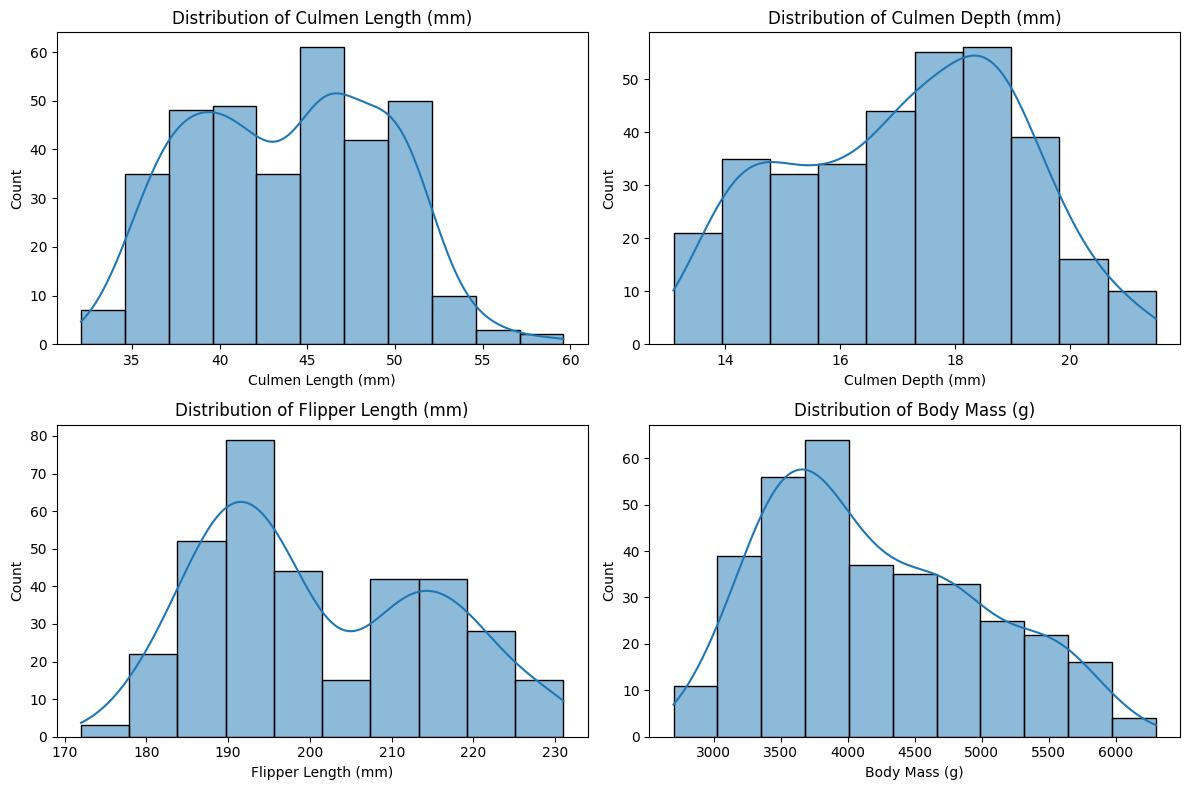

In [17]:
# Visualize distribution of each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()


In [18]:
# Split data into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

In [19]:
# Encode the labels in the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [21]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Save the model and the label encoder for future use
dump(model, 'iris_model.joblib')
dump(label_encoder, 'label_encoder.joblib')
print("\nModel and label encoder saved successfully.")


Model and label encoder saved successfully.


In [23]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 98.08%


In [24]:
# Generate the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [25]:
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[48  2  0]
 [ 0 20  0]
 [ 0  0 34]]


In [26]:
print("\nClassification Report:")
print(class_report)


Classification Report:
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.96      0.98        50
Chinstrap penguin (Pygoscelis antarctica)       0.91      1.00      0.95        20
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        34

                                 accuracy                           0.98       104
                                macro avg       0.97      0.99      0.98       104
                             weighted avg       0.98      0.98      0.98       104



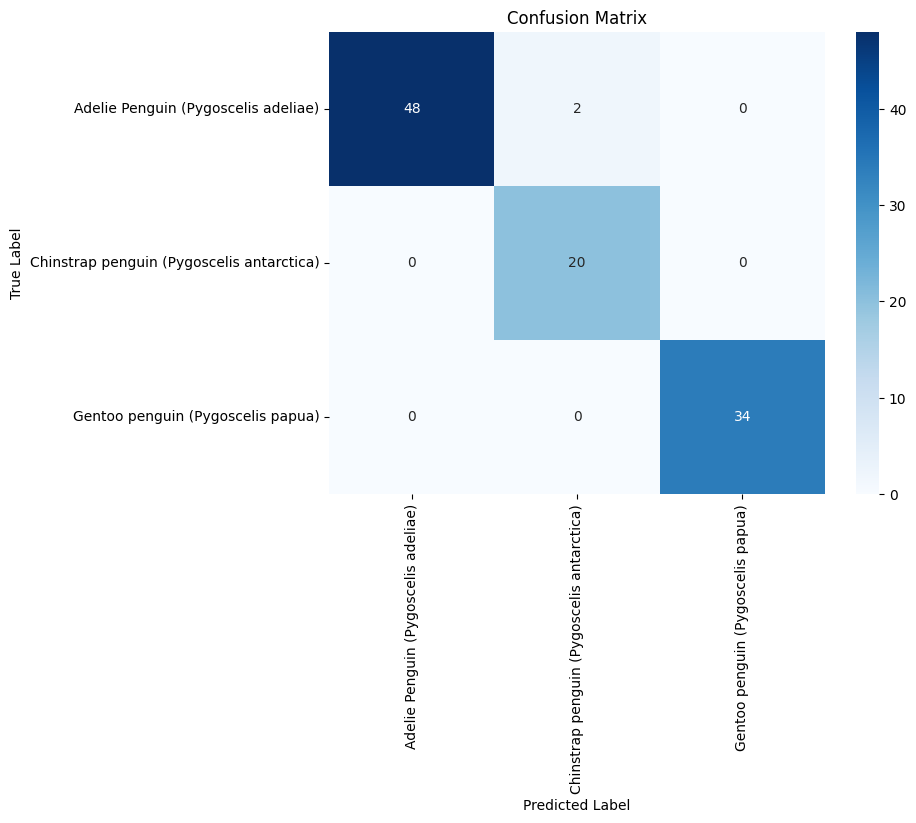

In [27]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [28]:
# Load the model and label encoder for predictions
loaded_model = load('iris_model.joblib')
loaded_label_encoder = load('label_encoder.joblib')

In [29]:
# Example of making predictions on new data
new_data = pd.DataFrame({
    'Culmen Length (mm)': [45.5],
    'Culmen Depth (mm)': [17.5],
    'Flipper Length (mm)': [210],
    'Body Mass (g)': [4500]
})

In [30]:
# Predict and decode the label
predictions = loaded_model.predict(new_data)
predicted_species = loaded_label_encoder.inverse_transform(predictions)
print(f"\nPredicted Species for new data: {predicted_species[0]}")


Predicted Species for new data: Gentoo penguin (Pygoscelis papua)
